In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=0a20e19676a1131a3a7fb0e825bcca4c97bb9dced1a99

In [ ]:
%matplotlib inline

import warnings
import itertools    
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')

# warnings.filterwarnings('ignore')

<ipython-input-2-4d3d7f740b9d>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
# Dowload the dataset
!pip install opendatasets --upgrade
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions/download?datasetVersionNumber=1'
od.download(dataset_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rahulch19
Your Kaggle Key: ··········


100%|██████████| 11.9M/11.9M [00:01<00:00, 7.39MB/s]


In [ ]:
df = pd.read_csv('/content/eeg-brainwave-dataset-feeling-emotions/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
# Checking for missing values
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)
# NO missing value

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64


<Axes: title={'center': 'Label'}>

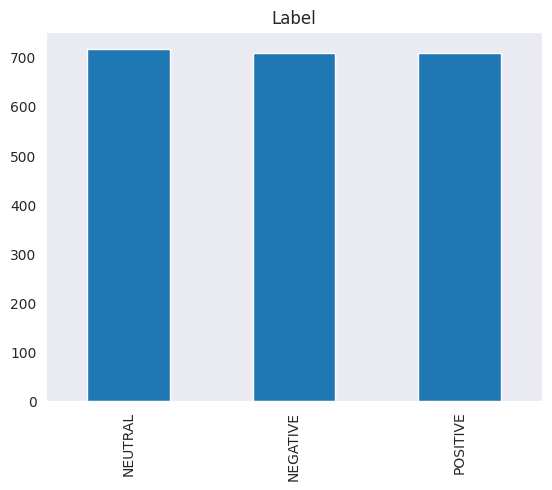

In [ ]:
print(f'{df.label.value_counts()}')
df.label.value_counts().plot(kind='bar', color='tab:blue', title='Label')

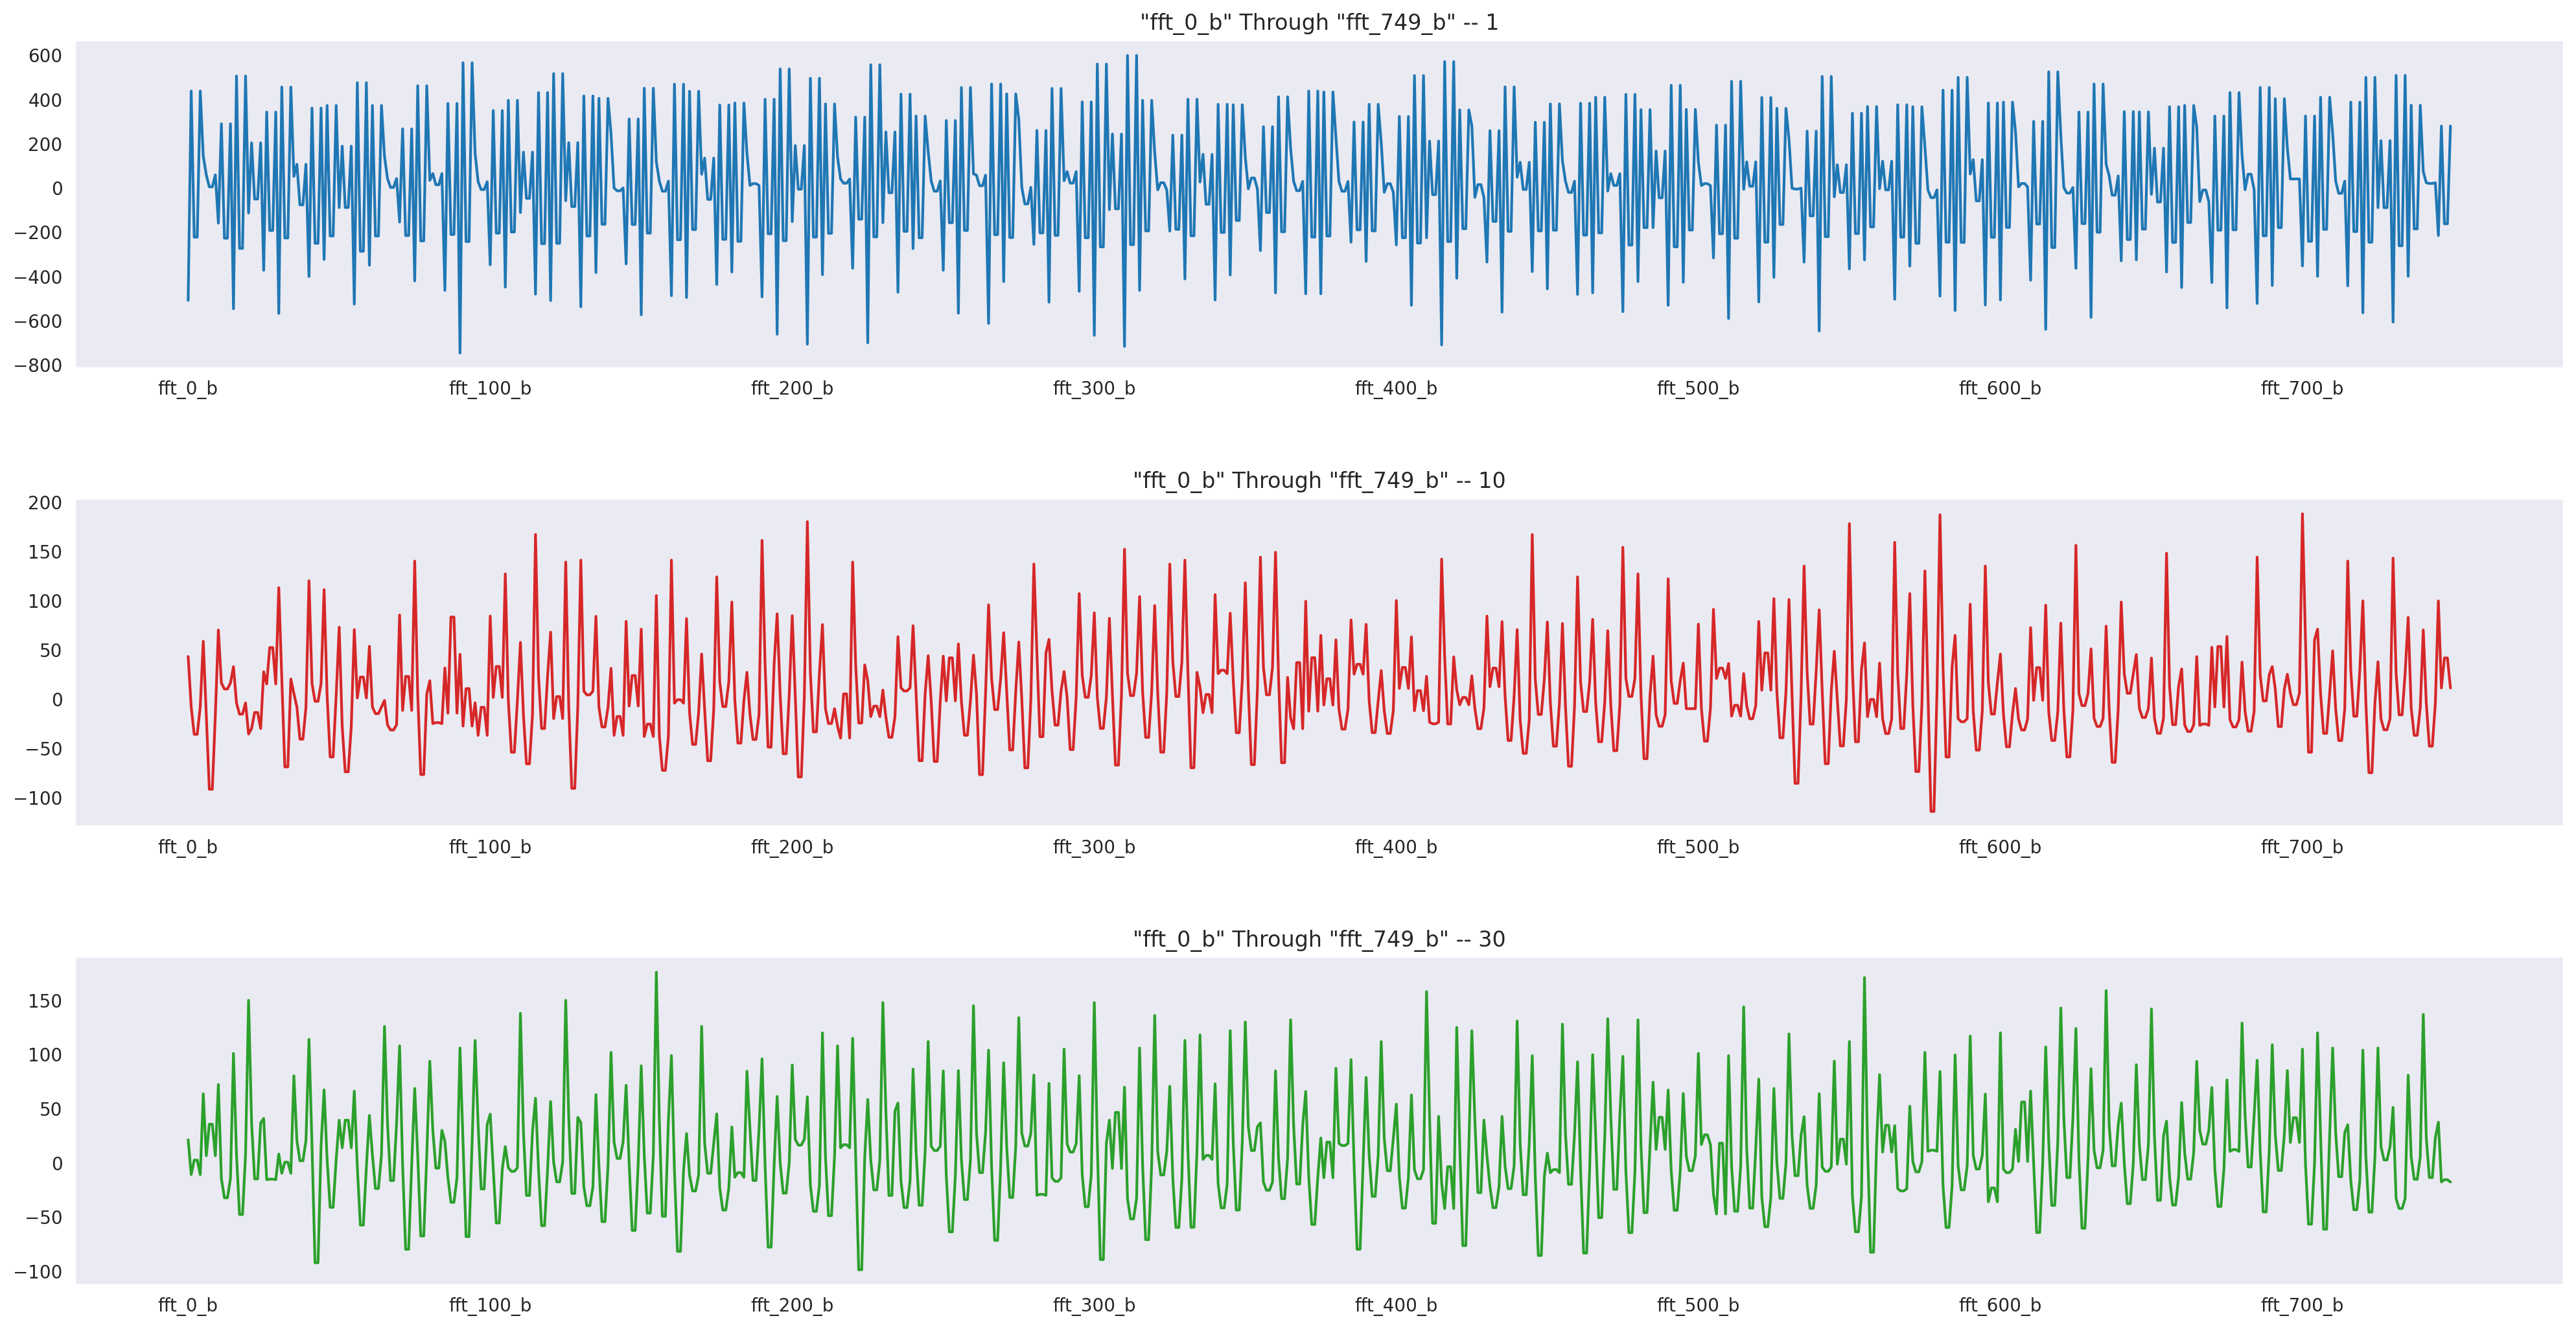

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

df.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
df.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
df.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

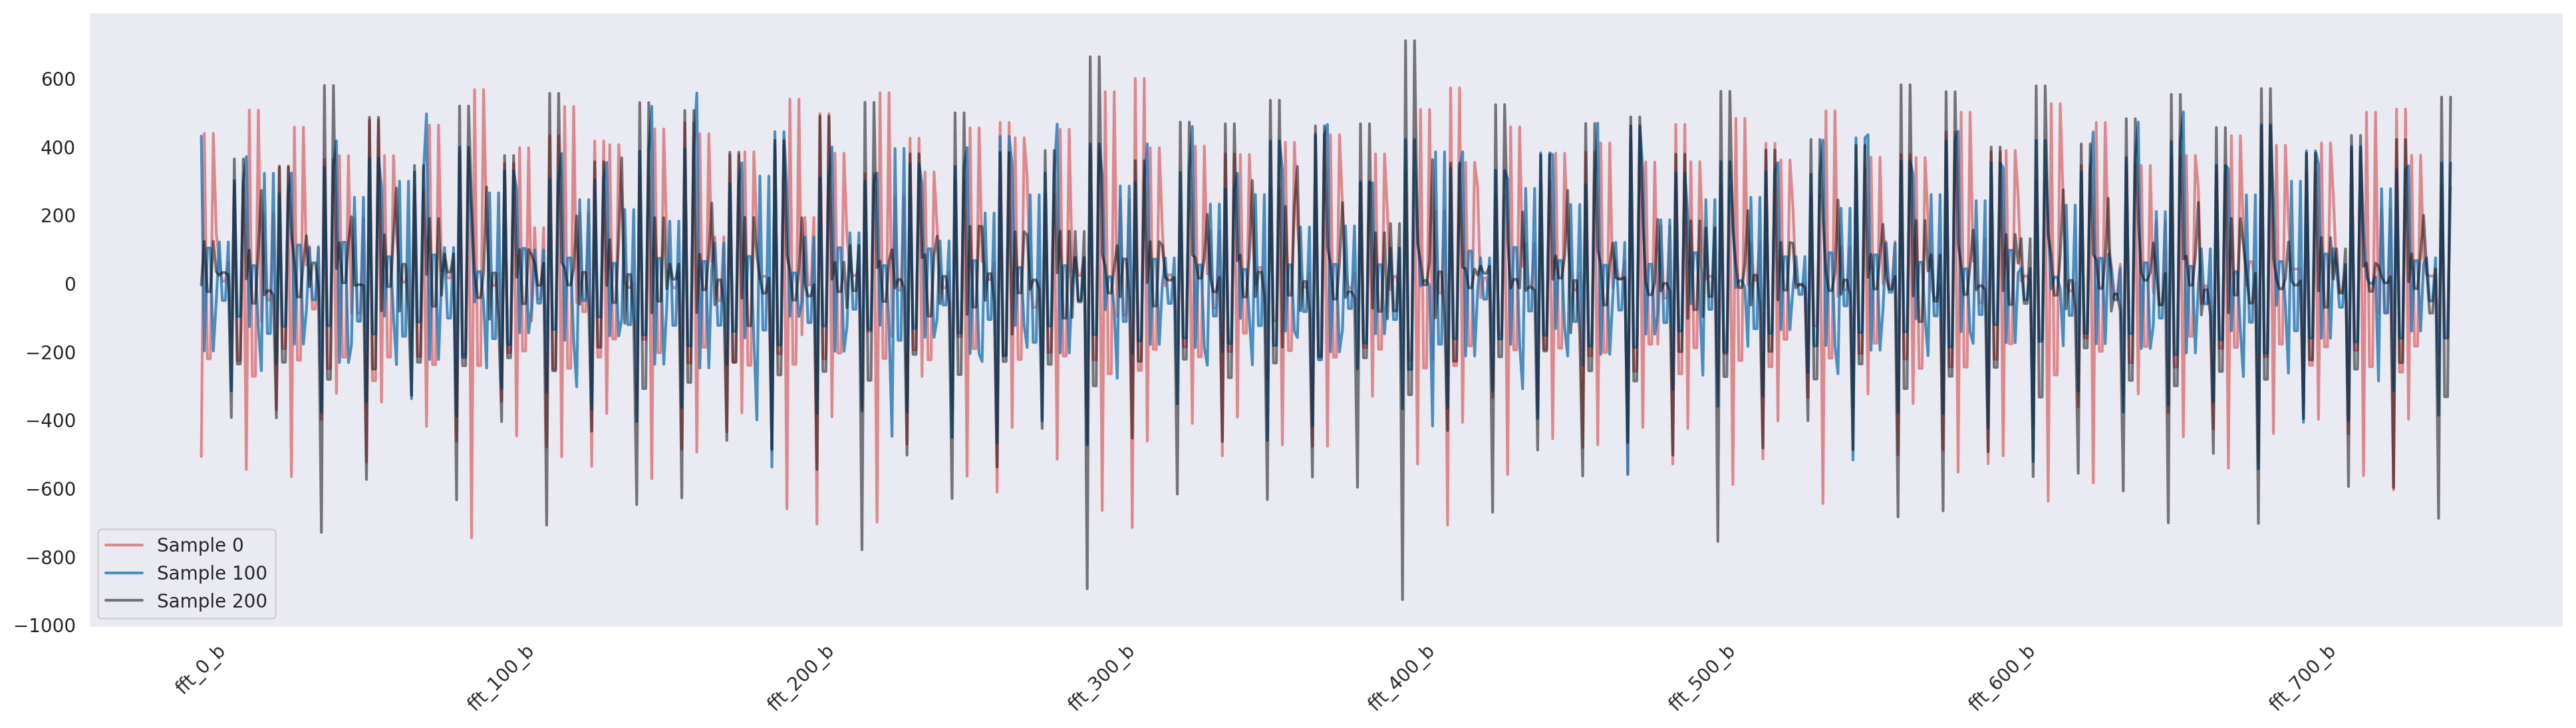

In [ ]:
plt.figure(dpi=200, figsize=(24, 6))


plt.plot(df.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(df.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(df.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)


plt.xticks(np.arange(0, len(df.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')

plt.show()

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [ ]:
print(f'{df.label.value_counts()}')

1    716
0    708
2    708
Name: label, dtype: int64


In [ ]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)
print(x_val.shape)

(1044, 2548)
(640, 2548)
(1044,)
(640,)
(448, 2548)


In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1],1))

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [ ]:
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()

X = StandardScaler().fit_transform(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y,random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val=train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [ ]:
#@title DNN
i_dnn = Input(shape=(2548, ))

x_dnn = Dense(2548, activation='relu')(i_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(5096, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.3)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(2548, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

y_dnn = Dense(3, activation='softmax')(x_dnn)

dnn_model = Model(i_dnn, y_dnn)

dnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 dense (Dense)               (None, 2548)              6494852   
                                                                 
 batch_normalization (BatchN  (None, 2548)             10192     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2548)              0         
                                                                 
 dense_1 (Dense)             (None, 3822)              9742278   
                                                                 
 batch_normalization_1 (Batc  (None, 3822)             15288     
 hNormalization)                                             

In [ ]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_dnn_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
                                    
dnn_model.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])
        
dnn_h = dnn_model.fit(X_train, Y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=20,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/20
31/33 [===========================>..] - ETA: 0s - loss: 2.0727 - accuracy: 0.8115
Epoch 1: val_accuracy improved from -inf to 0.33929, saving model to ./best_dnn_model.h5
33/33 [==============================] - 14s 179ms/step - loss: 1.9976 - accuracy: 0.8103 - val_loss: 395.5408 - val_accuracy: 0.3393 - lr: 0.0010
Epoch 2/20
31/33 [===========================>..] - ETA: 0s - loss: 0.4442 - accuracy: 0.8891
Epoch 2: val_accuracy improved from 0.33929 to 0.55804, saving model to ./best_dnn_model.h5
33/33 [==============================] - 4s 131ms/step - loss: 0.4289 - accuracy: 0.8927 - val_loss: 54.3238 - val_accuracy: 0.5580 - lr: 9.0484e-04
Epoch 3/20
31/33 [===========================>..] - ETA: 0s - loss: 0.2250 - accuracy: 0.9345
Epoch 3: val_accuracy improved from 0.55804 to 0.59375, saving model to ./best_dnn_model.h5
33/33 [==============================] - 4s 127ms/step - loss: 0.2244 - accuracy: 0.9330 - val_loss: 27.2734 - val_accuracy: 0.5938 - lr: 8.1873e-04


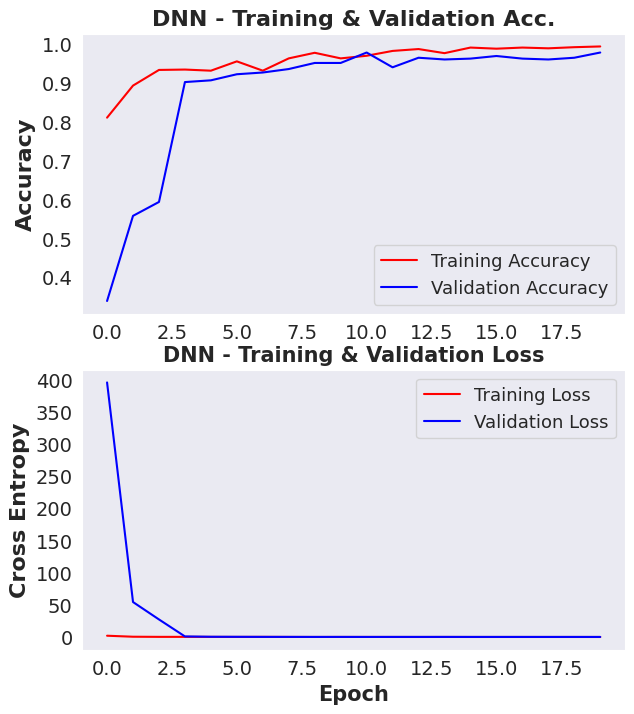

In [ ]:
# Show History
acc = dnn_h.history['accuracy']
val_acc = dnn_h.history['val_accuracy']

loss = dnn_h.history['loss']
val_loss = dnn_h.history['val_loss']


plt.figure(figsize=(7, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Acc.', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [ ]:
dnn_best = load_model('./best_dnn_model.h5')
dnn_acc = dnn_best.evaluate(x_test, y_test, verbose=0)[1]
print("Test Acc. DNN: {:.3f}%".format(dnn_acc * 100))

Test Acc. DNN: 96.562%


In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), dnn_best.predict(x_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


20/20 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       0.99      0.97      0.98       231
           2       0.94      0.96      0.95       219

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
print(y_test[0:10])

1835    0
1537    1
804     1
1019    2
1150    1
1981    1
1823    1
1852    0
1082    2
96      2
dtype: int64


In [ ]:
y_test

1835    0
1537    1
804     1
1019    2
1150    1
       ..
432     1
1248    0
1677    2
288     1
410     2
Length: 640, dtype: int64

In [ ]:
print(y_pred[0:11])

[0 1 1 2 1 1 1 0 2 0 1]


In [ ]:
label = y_test[1537]
print('Label:', label, ', Predicted:',y_pred )

Label: 1 , Predicted: [0 1 1 2 1 1 1 0 2 0 1 0 1 1 2 0 0 0 0 1 2 2 0 0 0 0 2 1 1 2 0 1 2 1 0 1 2
 2 1 2 2 2 2 2 2 0 2 2 2 1 1 0 0 1 1 0 1 1 2 1 0 1 2 0 0 1 2 1 2 1 2 1 0 0
 0 1 2 0 2 0 1 2 1 1 1 2 2 0 0 2 1 2 1 2 0 2 1 1 0 2 0 2 0 0 2 1 1 1 1 1 2
 0 2 1 0 1 0 1 1 0 2 2 2 1 0 2 2 1 2 1 0 2 0 0 1 0 1 0 1 0 2 0 0 0 2 0 0 1
 0 0 2 1 1 2 1 1 1 1 2 2 0 1 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 0 2 1 0 0 2 1 0
 0 1 0 1 2 2 2 1 2 0 2 0 1 0 1 2 1 1 0 2 1 0 2 0 1 1 1 1 1 0 1 2 0 0 1 1 1
 0 2 0 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 0 1 1 2 0 1 0 1 1 2 0 1 1 0 1 2 0 2
 1 0 2 2 2 1 1 1 1 1 0 2 0 2 2 2 2 2 2 0 0 2 2 1 1 2 1 2 2 0 1 2 2 2 2 1 2
 1 0 2 2 1 0 1 0 1 1 1 2 1 0 2 0 2 1 2 1 2 0 1 0 1 2 2 1 2 2 1 0 0 2 2 1 0
 2 1 2 1 2 1 0 2 1 1 0 1 2 0 2 1 1 2 1 2 2 0 0 0 1 0 2 2 0 1 1 1 0 1 0 2 0
 2 2 1 2 0 1 0 0 0 1 0 0 0 2 2 0 1 1 1 2 2 1 1 1 1 1 1 2 2 0 1 0 1 1 0 0 2
 2 0 1 2 2 1 1 1 1 2 1 1 1 2 1 2 0 2 0 1 0 2 0 2 1 1 2 0 0 2 2 0 2 1 0 1 2
 1 2 0 2 1 2 2 0 1 0 1 0 2 2 2 1 0 0 0 2 0 0 2 1 2 0 0 1 1 1 1 1 0 1 1 1 1
 2 

In [ ]:
label = y_test[1835]
print('Label:', label, ', Predicted:', y_pred[0])

Label: 0 , Predicted: 0


In [ ]:
label = y_test[804]
print('Label:', label, ', Predicted:', y_pred[2])

Label: 1 , Predicted: 1


In [ ]:
label = y_test[1150]
print('Label:', label, ', Predicted:', y_pred[4])

Label: 1 , Predicted: 1


In [ ]:
label = y_test[96]
print('Label:', label, ', Predicted:', y_pred[9])

Label: 2 , Predicted: 2


In [ ]:
label = y_test[410]
print('Label:', label, ', Predicted:', y_pred[639])

Label: 2 , Predicted: 2


In [ ]:
label = y_test[804]
print('Label:', label, ', Predicted:', y_pred[2])

Label: 1 , Predicted: 1
